# Machine Learning Life_Cycle Example

# 1. Define Objectives

Objectives:Infer how IQ,Year_Experiance,and Age affects Income using a linear model

# 2.Collect Data

In [16]:
#import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf


In [17]:
#create dataset
np.random.seed(555)
x1=np.random.normal(100,15,200).astype(int)
x2=np.random.normal(10,4.5,200)
x3=np.random.normal(32,4,200).astype(int)
dob=np.datetime64('2019-01-22')-365*x3
b=5
err=np.random.normal(0,1.5,200)
Y=np.array([0.3*x1+1.5*x2+0.83*x3+b+err for x1,x2,x3,err in zip(x1,x2,x3,err)])

# 3.Data Cleaning

In [18]:
cols=['iq','year_exps','dob']

In [19]:
df=pd.DataFrame(list(zip(x1,x2,dob)),columns=cols)

In [20]:
df['income']=Y

In [21]:
df.head()

,iq,year_exps,dob,income
0,102,3.134666,1996-01-28,58.665854
1,105,15.245371,1994-01-28,78.989823
2,83,2.391084,1990-01-29,57.564307
3,103,9.606721,1986-01-30,75.783867
4,97,11.134619,1983-01-31,82.547093


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
iq           200 non-null int64
year_exps    200 non-null float64
dob          200 non-null datetime64[ns]
income       200 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.3 KB


In [23]:
df.describe()

,iq,year_exps,income
count,200.000000,200.000000,200.000000
mean,98.895000,9.708405,75.177962
std,14.991253,4.654536,8.889551
min,62.000000,-5.789565,49.467100
25%,88.500000,6.603565,69.391361
50%,99.000000,10.021919,75.180707
75%,108.250000,12.927809,80.739804
max,134.000000,21.889216,98.380710


In [24]:
df=df[df['year_exps']>=0]
df.describe()

,iq,year_exps,income
count,196.000000,196.000000,196.000000
mean,98.959184,9.963718,75.603845
std,14.769628,4.332578,8.424493
min,62.000000,0.084480,54.325402
25%,88.500000,6.940314,69.619532
50%,99.000000,10.192384,75.327426
75%,108.250000,12.967590,80.798796
max,134.000000,21.889216,98.380710


# 4.EDA

In [25]:
df.describe(include=['datetime64'])

,dob
count,196
unique,22
top,1988-01-30 00:00:00
freq,20
first,1977-02-01 00:00:00
last,1998-01-27 00:00:00


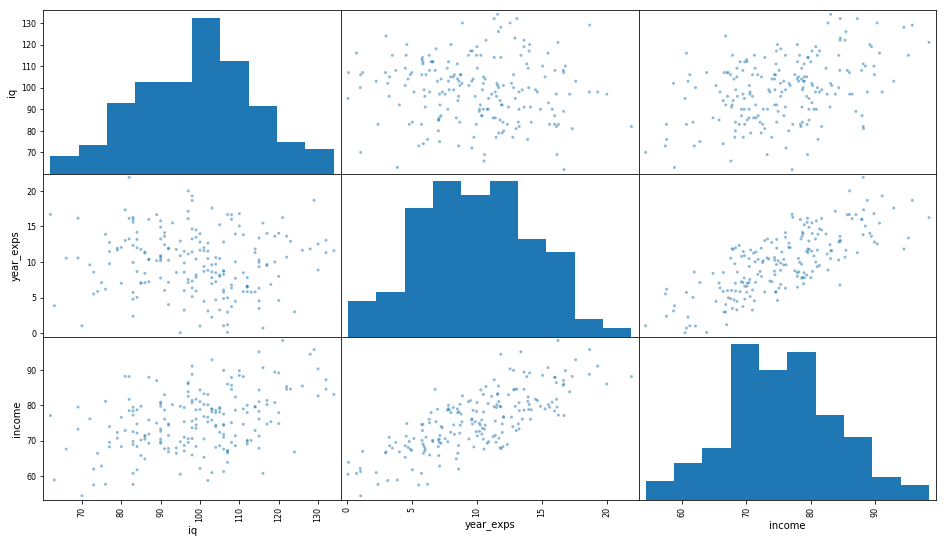

In [26]:
pd.plotting.scatter_matrix(df,figsize=(16,9));

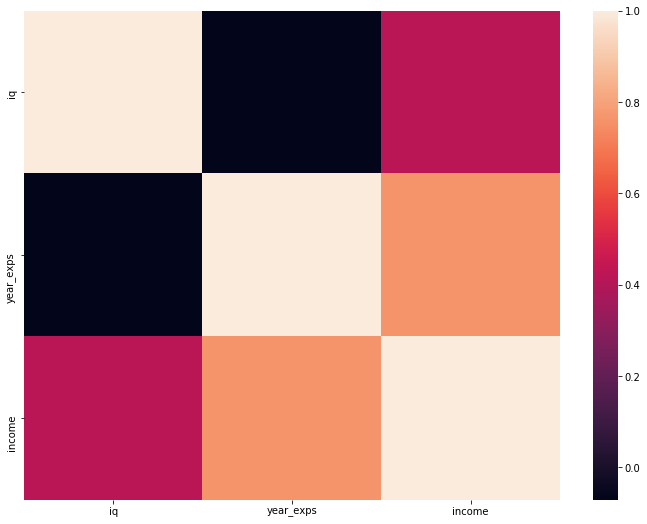

In [27]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

# 5.Data Preprocessing / Feature Engineering

In [28]:
from datetime import datetime as dt
df['age']=df.dob.apply(lambda x: (dt.strptime('2019-01-22','%Y-%m-%d')-x).days/365)
df.drop('dob',axis=1,inplace=True)

In [29]:
df.head()

,iq,year_exps,income,age
0,102,3.134666,58.665854,23.0
1,105,15.245371,78.989823,25.0
2,83,2.391084,57.564307,29.0
3,103,9.606721,75.783867,33.0
4,97,11.134619,82.547093,36.0


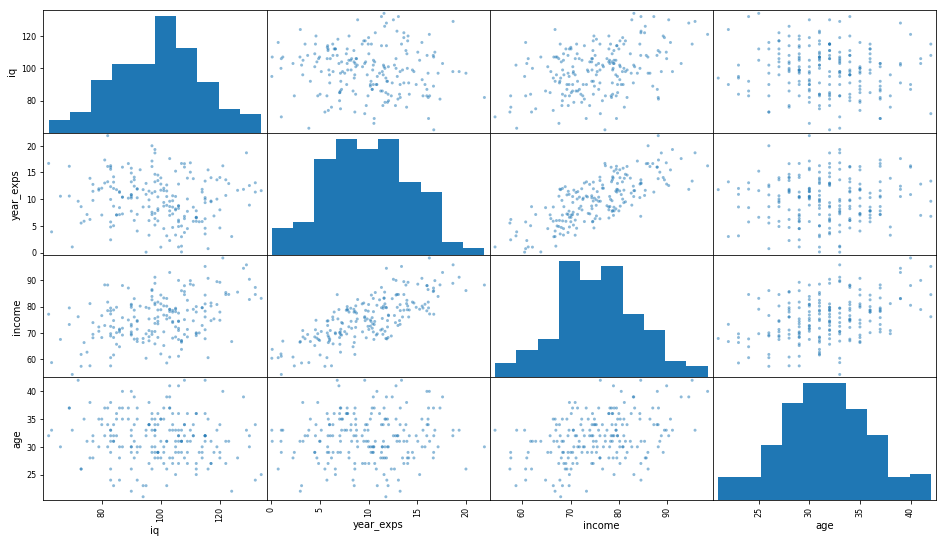

In [30]:
pd.plotting.scatter_matrix(df,figsize=(16,9));

# 6.Train/Eval Model